# First algorithm

## Load Data

In [2]:
import numpy as np
from sklearn.datasets import load_files
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
train_dir = '../data/fruits-360/Training'
test_dir = '../data/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
X_train, y_train,target_labels = load_dataset(train_dir)
X_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

X_train = X_train[:25000]
y_train = y_train[:25000]

X_test = X_test[:15000]
y_test = y_test[:15000]

print('Training set size : ' , X_train.shape[0])
print('Testing set size : ', X_test.shape[0])

Loading complete!
Training set size :  25000
Testing set size :  15000


In [4]:
print(X_train[1000])
print(len(np.unique(y_train)))
print(len(target_labels))

../data/fruits-360/Training/Maracuja/204_100.jpg
131
131


In [5]:
no_of_classes = len(np.unique(y_train))

In [6]:
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [7]:
X_test,X_valid = X_test[7000:],X_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',X_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',X_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (8000,)
Test y :  (8000, 131)


In [8]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

X_valid = np.array(convert_image_to_array(X_valid))
print('Validation set shape : ',X_valid.shape)

X_test = np.array(convert_image_to_array(X_test))
print('Test set shape : ',X_test.shape)

print('1st training image shape ',X_train[0].shape)

Training set shape :  (25000, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (8000, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [8]:
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
X_test = X_test.astype('float32')/255

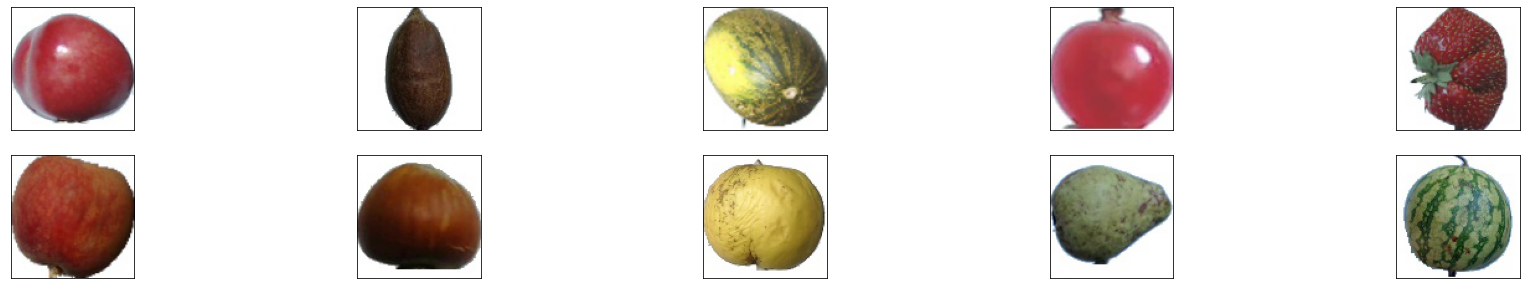

In [9]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [12]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(X_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30
782/782 - 119s - loss: 2.1663 - accuracy: 0.4419 - val_loss: 1.0554 - val_accuracy: 0.7311

Epoch 00001: val_loss improved from inf to 1.05544, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/30
782/782 - 98s - loss: 0.4719 - accuracy: 0.8460 - val_loss: 0.3945 - val_accuracy: 0.8974

Epoch 00002: val_loss improved from 1.05544 to 0.39449, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/30
782/782 - 96s - loss: 0.2407 - accuracy: 0.9203 - val_loss: 0.3326 - val_accuracy: 0.9281

Epoch 00003: val_loss improved from 0.39449 to 0.33261, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/30
782/782 - 97s - loss: 0.1729 - accuracy: 0.9423 - val_loss: 0.2326 - val_accuracy: 0.9480

Epoch 00004: val_loss improved from 0.33261 to 0.23255, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/30
782/782 - 95s - loss: 0.1311 - accuracy: 0.9587 - val_loss: 0.7798 - val_accuracy: 0.8501

Epoch 00005: val_loss did not improve from 0.23255
Epoch 6/30
782/782 - 96s - loss: 0.102

In [13]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [1]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

NameError: name 'model' is not defined